# DAV 5400 Project 1

## Continental Airlines Analysis

I chose to focus my analysis on one airline - Continental Airlines (CO). <br>
I wanted to help Continental find out more information about its flights in 3 different areas: <br>
    1. Cancellations
    2. Delays
    3. Early Arrivals
Within each category, I want to answer the following questions:
    1. How many of each category have we had (ie. Cancellations, Delays, Early Arrivals)?
    2. How do we compare to other airlines within the category?
    3. Within the category, to what destinations are most of our flights?
    4. Within the category, on which day are most of our flights?
    5. For cancellations only, what is the reason most of our flights are cancelled?
I think that Continental can use this information to determine which of their flights are doing well, which need improvements, what other changes they need to make, and how best ot improve their service.

## Initializing the Data Set
I imported the pandas package to handle the Houston Flights data. <br>
The data contains 20,000 rows of flights data on flights departing from Houston airports in 2011. <br>
The data is loaded into a pandas DataFrame and stored in the planes variable. <br>

In [1]:
import pandas as pd

In [2]:
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv" #set filename
planes = pd.read_csv(filename) #read file into dataframe.

### Exploration of the Planes Data
I looked at the first 5 rows of the planes Data Frame to see what the data looked like. <br>
I used the describe function to find out information about the dataset, such as the mean of numerical columns. <br>
From the description of the data, I discovered that the data is missing 264 rows of arrival delays, actual elapsed time and air time data. <br>

In [3]:
planes.head() #show first 5 rows of dataframe.

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [4]:
planes.describe() # descriptive stats about planes.

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,20000.0,20000.000000,20000.000000,20000.000000,19785.000000,19766.000000,20000.000000,19738.000000,19738.000000,19738.000000,19785.000000,20000.000000,19766.000000,19780.000000,20000.000000,20000.000000
mean,2011.0,1.054500,16.319000,4.020300,1396.328228,1586.669382,1626.416900,126.795319,105.584355,5.205340,8.297700,772.899550,6.076546,15.134328,0.011200,0.001900
std,0.0,0.227007,9.025692,2.096904,441.598739,458.489922,1142.067143,60.158125,57.655970,25.383494,23.934218,458.640531,4.085732,7.046056,0.105238,0.043549
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,23.000000,-49.000000,-18.000000,127.000000,1.000000,4.000000,0.000000,0.000000
25%,2011.0,1.000000,8.000000,2.000000,1026.000000,1224.250000,582.000000,74.000000,54.000000,-8.000000,-3.000000,351.000000,4.000000,10.000000,0.000000,0.000000
50%,2011.0,1.000000,17.000000,4.000000,1416.000000,1620.000000,1644.000000,123.000000,102.000000,0.000000,1.000000,787.000000,5.000000,14.000000,0.000000,0.000000
75%,2011.0,1.000000,25.000000,6.000000,1801.000000,1955.000000,2536.000000,162.000000,138.000000,11.000000,10.000000,1034.000000,7.000000,18.000000,0.000000,0.000000
max,2011.0,2.000000,31.000000,7.000000,2335.000000,2400.000000,7037.000000,539.000000,499.000000,775.000000,780.000000,3904.000000,140.000000,78.000000,1.000000,1.000000


### New Columns Created
I created three new columns in the dataset:
    1. TotalDelay - the total time (in minutes) that a flight was delayed. This column is created by adding together the arrival delay and the departure delay.
    2. Delayed - a boolean category that shows whether a flight was delayed. This column is created by checking whether TotalDelay is greater than 0 (it is possible to have a delay less than zero). 
    3. Early - a boolean category that shows whether a flight was early. This column is created by checking whether the TotalDelay is less than 0, ie. a negative delay means that a flight was early.
I made these changes to make it easier for me to do analysis on the planes data to be able to answer my research questions about delayed flights and early flights for Continental Airlines.

In [5]:
planes['TotalDelay'] = planes['ArrDelay'] + planes['DepDelay'] # create TotalDelay column

In [6]:
planes['Delayed'] = planes['TotalDelay'] > 0 # create Delayed column

In [7]:
planes['Early'] = planes['TotalDelay'] < 0 # create Early column

In [8]:
#descriptive statistics on flights that are exactly on time (neither early nor delayed)
planes[(planes['Early'] == False) & (planes['Delayed'] == False)].describe() 

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,TotalDelay
count,694.0,694.000000,694.000000,694.000000,479.000000,460.000000,694.000000,432.000000,432.000000,432.000000,479.000000,694.000000,460.000000,474.000000,694.000000,694.000000,432.0
mean,2011.0,1.050432,16.001441,3.602305,1360.311065,1564.686957,1605.551873,122.129630,100.495370,-0.502315,2.356994,750.917867,6.182609,15.413502,0.322767,0.054755,0.0
std,0.0,0.218993,8.895659,2.122591,422.311181,433.375943,1262.603901,52.690726,50.226679,3.407375,15.173057,446.514060,3.581805,6.069881,0.467871,0.227666,0.0
min,2011.0,1.000000,1.000000,1.000000,553.000000,12.000000,1.000000,39.000000,28.000000,-14.000000,-10.000000,127.000000,1.000000,5.000000,0.000000,0.000000,0.0
25%,2011.0,1.000000,10.000000,2.000000,1014.000000,1227.250000,482.000000,75.000000,54.000000,-2.000000,-1.000000,359.000000,4.000000,11.000000,0.000000,0.000000,0.0
50%,2011.0,1.000000,15.000000,3.000000,1330.000000,1608.000000,1603.000000,121.500000,100.000000,0.000000,0.000000,696.000000,5.000000,15.000000,0.000000,0.000000,0.0
75%,2011.0,1.000000,24.000000,6.000000,1731.000000,1922.250000,2559.000000,156.250000,132.250000,1.000000,2.000000,1009.000000,7.000000,19.000000,1.000000,0.000000,0.0
max,2011.0,2.000000,31.000000,7.000000,2306.000000,2357.000000,7037.000000,278.000000,261.000000,10.000000,198.000000,3904.000000,32.000000,42.000000,1.000000,1.000000,0.0


##  Cancellations
In this section, I examine my research questions about cancellations for Continental Airlines. <br>
To answer these questions, I created different variables that grouped data about cancelled flights into different categories. <br>
### Question 1 - How Do Many Cancellations Did Continental Have?
For the first question, I created a variable co_cancelled by filtering the planes data such that the carrier was CO, and the Cancelled variable was 1 (ie. True). <br>
I then count the number of times that one of the columns (Year) appears in the co_cancelled variable, which is the number of times that Continental Flights were cancelled. <br>
The number of Continental cancelled flights is 53. 

In [9]:
# all rows of planes data that are cancelled flights and carrier CO
co_cancelled = planes[(planes['Cancelled'] == 1) & (planes['UniqueCarrier'] == 'CO')] 
co_cancelled['Year'].count() # count of cancelled CO flights

53

### Question 2 - How Does Continental Compare to Other Airlines in Terms of Cancellations
To answer this question, I filtered the data on cancellations, and grouped the data by UniqueCarrier. <bR>
I set the variable planes_cancelled to hold the size of these groups. <br>
So the planes_cancelled variable holds the name of each carrier and the number of cancelled flights they have.<br>
I presented a bar graph which shows that Contintental had the most cancelled flights, descriptive statistics about the data which show that Continental is the maximum value, and about 35 more cancelled flights than the average, and then the top 5 airlines by most cancelled flights which shows that Continental is number 1.

In [10]:
# all rows of planes data where flight is cancelled grouped by UniqueCarrier.
# the size method is used to get a count for each UniqueCarrier.
planes_cancelled = planes[planes['Cancelled'] == 1].groupby('UniqueCarrier').size()
planes_cancelled.plot.bar() #plot a bar chart of the data.

In [11]:
# descriptive statistics about the planes_cancelled data.
planes_cancelled.describe()

count    12.000000
mean     18.666667
std      17.395576
min       3.000000
25%       6.750000
50%      10.500000
75%      24.250000
max      53.000000
dtype: float64

In [12]:
# The top 5 carriers by planes cancelled.
planes_cancelled.nlargest(5)

UniqueCarrier
CO    53
XE    48
WN    37
DL    20
AA    14
dtype: int64

While it may have appeared from the previous analysis that Continental was the worst offender at cancelled flights, because they had the most cancelled flights, I wanted to check the percentage of cancelled flights that each airline had, as it was possible that Continental had a lot more flights than other airlines. <br>
To do that, I grouped all the data in planes by UniqueCarrier and got the size of those groups. <br>
Then, I divided the planes_cancelled by the planes_copy and multiplied by 100, to get the percentage of flights cancelled for each carrier. <br>
I then made a horizontal bar chart of this data, and you can see the Continental (CO) is amongst the lowest percentage of cancelled flights. <bR>
I also showed the top 5 and bottom 5 of flight carriers percentage of cancelled flights, and found that Continental had the second lowest percentage of cancelled flights. <br>
So my hypothesis was true; CO had the highest number of cancellations, because they had a lot of flights in the database. <br>

In [13]:
# all rows of planes data grouped by UniqueCarrier.
# The size function is used to get the number of flights for each UniqueCarier.
planes_copy = planes.groupby('UniqueCarrier').size()

In [14]:
# The percentage of planes cancelled is planes_cancelled divided by planes_copy
# and multiplied by 100. 
planes_percent_cancelled = (planes_cancelled/planes_copy) * 100

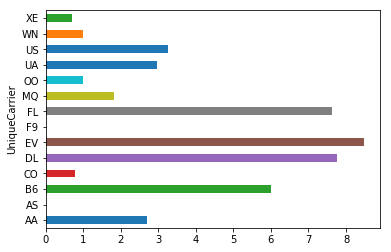

In [15]:
# a horizontal bar plot of the planes_percent_cancelled.
planes_percent_cancelled.plot.barh()

In [16]:
# The top 5 carriers by planes_cancelled percentage.
planes_percent_cancelled.nlargest(5)

UniqueCarrier
EV    8.490566
DL    7.751938
FL    7.638889
B6    6.000000
US    3.246753
dtype: float64

In [17]:
# The bottom 5 carriers by planes_cancelled percentage.
planes_percent_cancelled.nsmallest(5)

UniqueCarrier
XE    0.708487
CO    0.775988
WN    0.997843
OO    1.001431
MQ    1.812689
dtype: float64

### Question 3 - Where are Most of Continental's Cancelled Flights To?
To answer this question, I grouped all of CO's cancelled flights by Dest (destination), and again used the size function to get the counts for each category. <br>
I then found the top 5 destinations to which Continental had cancelled flights, and found that numbers 1 and 2 were Newark Airport (EWR) and Laguardia Airport (LGA). <br>
By percentage though, most of Continental's cancelled flights are to Hartsfield_Jackson Airport (ATL) and Laguardia again, with Newark in third. 

In [18]:
# all rows of planes data where carrier is CO and 
# flight was cancelled grouped by Dest.
# The size function is used to get the number of flights for each Dest.
co_cancelled_dest = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Cancelled'] == 1)].groupby("Dest").size()

In [19]:
# the top 5 Continental cancelled destinations.
co_cancelled_dest.nlargest(5)

Dest
EWR    13
LGA    11
DCA     8
BOS     5
ATL     3
dtype: int64

In [20]:
# all CO flights grouped by destination.
# size is used to get the count of all flights by destination.
co_dest = planes[planes['UniqueCarrier'] == 'CO'].groupby("Dest").size()

In [21]:
# the percentage of CO cancelled flights by destination.
co_cancelled_dest_pct = (co_cancelled_dest/co_dest) * 100
# the top 5 highest CO destination cancellation percentages.
co_cancelled_dest_pct.nlargest(5)

Dest
ATL    4.761905
LGA    4.347826
EWR    3.641457
TUL    3.448276
CLT    3.225806
dtype: float64

### Question 4 - Which Day Has the Most Cancelled Continental Flights?
To answer this question, I grouped all of CO's cancelled flights by DayofWeek, and again used the size function to get the counts for each category. <br>
I then found the top 2 days that Continental had flights cancelled, which were Wednesday with 27 flights and Tuesday with 9 flights. <br>
This time, those two days are also the top 2 days of the week that Continental had cancelled flights. 

In [22]:
# All CO cancelled flights grouped by DayofWeek.
# The size function is used to get the number of flights for each DayofWeek.
co_cancelled_day = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Cancelled'] == 1)].groupby("DayOfWeek").size()

In [23]:
# The top 2 days of week that CO had cancelled flights.
co_cancelled_day.nlargest(2)

DayOfWeek
3    27
2     9
dtype: int64

In [24]:
# All CO flights grouped by day.
# Size is used to get the number of flights.
co_day = planes[planes['UniqueCarrier'] == 'CO'].groupby("DayOfWeek").size()
# The percentage of flights cancelled per day.
co_cancelled_day_pct = (co_cancelled_day/co_day) * 100
# The top 2 days flights cancelled percentage.
co_cancelled_day_pct.nlargest(2)

DayOfWeek
3    3.683492
2    1.250000
dtype: float64

### Question 5 - Why Are Most of Continental's Flights Cancelled?
To answer this question, I grouped all of CO's cancelled flights by CancellationCode (cancellation reason), and again used the size function to get the counts for each category. <br>
I then found the top 2 cancellation reasons, and that the number one reason, by far, was weather with 48 cancellations.

In [25]:
# All CO cancelled flights grouped by cancellation code.
# The size function is used to get the number of flights.
co_cancelled_reason = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Cancelled'] == 1)].groupby("CancellationCode").size()

In [26]:
# The top 4 cancelled flight reasons, (there are only two though).
co_cancelled_reason.nlargest(4)

CancellationCode
B    48
A     5
dtype: int64

##  Delays
In this section, I examine my research questions about delays for Continental Airlines. <br>
To answer these questions, I created different variables that grouped data about cancelled flights into different categories. <br>
### Question 1 - How Do Many Delays Did Continental Have?
For the first question, I created a variable co_delayed by filtering the planes data such that the carrier was CO, and the Delayed variable was True. <br>
I then count the number of times that one of the columns (Year) appears in the co_delayed variable, which is the number of times that Continental Flights were cancelled. <br>
The number of Continental delayed flights is 3703. 

In [27]:
# all rows of planes data that are delayed flights and carrier CO
co_delayed = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Delayed'] == True)]
co_delayed['Year'].count() # the number of CO delayed flights.

3703

### Question 2 - How Does Continental Compare to Other Airlines in Terms of Delays
To answer this question, I filtered the data on Delayed, and grouped the data by UniqueCarrier. <bR>
I set the variable planes_delayed to hold the size of these groups. <br>
So the planes_cancelled variable holds the name of each carrier and the number of delayed flights they have.<br>
I presented a bar graph which shows that Contintental had the most cancelled flights, and the top 5 airlines by most cancelled flights which shows that Continental is number 1 by about 900 flights.

In [28]:
# all delayed flights grouped by UniqueCarrier
# size function is used to get the count for each UniqueCarrier
planes_delayed = planes[planes['Delayed'] == True].groupby('UniqueCarrier').size()

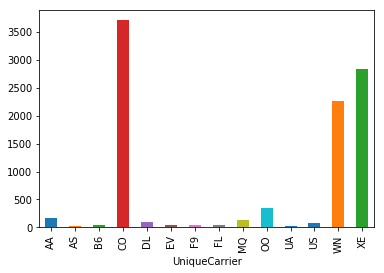

In [29]:
# bar plot of planes_delayed
planes_delayed.plot.bar()

In [30]:
# Top 5 planes delayed by carrier.
planes_delayed.nlargest(5)

UniqueCarrier
CO    3703
XE    2827
WN    2262
OO     352
AA     169
dtype: int64

While it may have appeared from the previous analysis that Continental was the worst offender at delayed flights, because they had the most delayed flights, I wanted to check the percentage of delayed flights that each airline had, as it was possible that Continental had a lot more flights than other airlines. <br>
To do that, I grouped all the data in planes by UniqueCarrier and got the size of those groups. <br>
Then, I divided the planes_delayed by the planes_copy and multiplied by 100, to get the percentage of flights delayed for each carrier. <br>
I then made a horizontal bar chart of this data, and you can see the Continental (CO) is still amongst the top percentages of delayed flights. <br>
I also showed the top 5 flight carriers by percentage of cancelled flights, and found that Continental had the third highest percentage of cancelled flights. <br>
So in this case, my hypothesis was false, and Continental is still amongst the worst offenders at delayed flights. <br>

In [31]:
# percentage of planes delayed by carrier
planes_delayed_pct=(planes_delayed/planes_copy) * 100

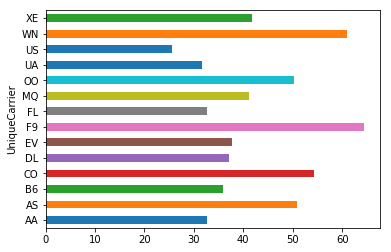

In [32]:
# horizontal bar chart of percentage of planes delayed by carrier.
planes_delayed_pct.plot.barh()

In [33]:
# Top 5 percentages of planes delayed by character.
planes_delayed_pct.nlargest(5)

UniqueCarrier
F9    64.516129
WN    61.003236
CO    54.216691
AS    50.847458
OO    50.357654
dtype: float64

### Question 3 - Where are Most of Continental's Delayed Flights To?
To answer this question, I grouped all of CO's delayed flights by Dest (destination), and again used the size function to get the counts for each category. <br>
I then found the top 5 destinations to which Continental had delayed flights, and found that numbers 1 and 2 were Los Angeles Airport (LAX) and Newark Airport (EWR) . <br>
By percentage though, most of Continental's delayed flights are to Seattle-Tacoma Airport (SEA) and Minneapolis−Saint Paul Aiport (MSP). <br>
So it appears that Continental has a lot of flights to LAX and EWR, which explains why there are so many delayed flights there. 

In [34]:
# All Delayed Continental Flights grouped by Destination.
# Size function is again used to get the count for each group.
co_delay_dest = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Delayed'] == True)].groupby('Dest').size()

In [35]:
# Top 5 Destinations with Delays for Continental
co_delay_dest.nlargest(5)

Dest
LAX    228
EWR    219
DEN    192
ORD    191
MSY    178
dtype: int64

In [36]:
# Percentage of Delayed Continental Flights by Destination
co_delay_dest_pct = (co_delay_dest/co_dest) * 100

In [37]:
# Top 5 Destinations of Delayed Continental Flights by Percentage.
co_delay_dest_pct.nlargest(5)

Dest
SEA    87.640449
MSP    82.857143
HNL    79.545455
SJU    78.378378
BHM    75.000000
dtype: float64

### Question 4 - Which Day Has the Most Delayed Continental Flights?
To answer this question, I grouped all of CO's delayed flights by DayofWeek, and again used the size function to get the counts for each category. <br>
I then found the top 2 days that Continental had flights delayed, which were Monday with 738 flights and Sunday with 706 flights. <br>
This time, those two days are also the top 2 days of the week that Continental had delayed flights but the order is flipped, with Sunday having the largest percentage, and Monday the second largest. 

In [38]:
# All Continental Delayed Flights grouped by DayofWeek
# Size is used to get the count for each day.
co_delay_day = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Delayed'] == True)].groupby('DayOfWeek').size()

In [39]:
# Top 5 Days of Continental Delayed Flights.
co_delay_day.nlargest(5)

DayOfWeek
1    738
7    706
6    613
5    511
4    469
dtype: int64

In [40]:
# Percentage of Continental Flights Delayed Per DAy.
co_delay_day_pct = (co_delay_day/co_day) * 100

In [41]:
# Top 5 Days of Continental Delayed Flights by Percentage.
co_delay_day_pct.nlargest(5)

DayOfWeek
7    59.128978
1    58.945687
4    56.506024
6    56.445672
2    51.250000
dtype: float64

##  Early Arrivals
In this section, I examine my research questions about cancellations for Continental Airlines. <br>
To answer these questions, I created different variables that grouped data about cancelled flights into different categories. <br>
### Question 1 - How Do Many Early Arrivals Do We Have
For the first question, I created a variable co_early by filtering the planes data such that the carrier was CO, and the Early variable was True. <br>
I then count the number of times that one of the columns (Year) appears in the co_early variable, which is the number of times that Continental Flights were early. <br>
The number of Continental early flights is 2910. 

In [42]:
# All Continental Flights that were Early.
co_early = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Early'] == True)]
co_early['Year'].count() # count of early Continental flights.

2910

### Question 2 - How Does Continental Compare to Other Airlines in Terms of Early Arrivals
To answer this question, I filtered the data on Early, and grouped the data by UniqueCarrier. <bR>
I set the variable planes_early to hold the size of these groups. <br>
So the planes_early variable holds the name of each carrier and the number of delayed flights they have.<br>
I presented the top 5 airlines by most cancelled flights which shows that Continental is number 2 by about 800 flights. <br>
This indicates that Continental is pretty good at having flights arrive early.

In [43]:
# All early arriving flights grouped by Unique Carrier.
# size is used to get the count for each carrier.
planes_early = planes[(planes['Early'] == True)].groupby('UniqueCarrier').size()

In [44]:
# The top 5 carriers with early arrivals.
planes_early.nlargest(5)

UniqueCarrier
XE    3733
CO    2910
WN    1322
AA     328
OO     321
dtype: int64

While it may have appeared from the previous analysis that Continental was pretty good at having flights arrive early, I wanted to check the percentage of early arriving flights that each airline had, as it was possible that Continental had a lot more flights than other airlines. <br>
To do that, I grouped all the data in planes by UniqueCarrier and got the size of those groups. <br>
Then, I divided the planes_early by the planes_copy and multiplied by 100, to get the percentage of flights arriving early for each carrier. <br>
I then made a bar chart of this data, and you can see the Continental (CO) is now amongst the lowest percentages of early arriving flights. <br>
I also showed the bottom 5 flight carriers by percentage of early arriving flights, and found that Continental had the third lowest percentage of early arriving flights. <br>
So in this case, my hypothesis was true, and Continental is actually not great at having flights arrive early. <br>

In [45]:
# Percentage of planes by Carrier that arrived early
planes_early_percent = (planes_early/planes_copy) *100

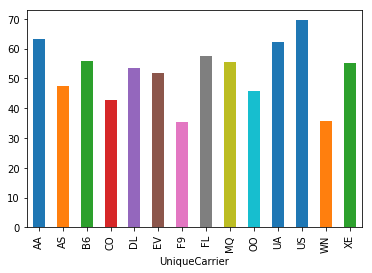

In [46]:
# A bar graph of early arriving flights by carrier.
planes_early_percent.plot.bar()

In [47]:
# The bottom 5 carriers by flights early arrival percentage.
planes_early_percent.nsmallest(5)

UniqueCarrier
F9    35.483871
WN    35.652643
CO    42.606149
OO    45.922747
AS    47.457627
dtype: float64

### Question 3 - Where are Most of Continental's Early Arriving Flights To?
To answer this question, I grouped all of CO's early arriving flights by Dest (destination), and again used the size function to get the counts for each category. <br>
I then found the top 5 destinations to which Continental had early arriving flights, and found that numbers 1 and 2 were Louis Armstrong New Orleans Aiport (MSY) and Ronald Reagan Airport (DCA) . <br>
By percentage though, most of Continental's early arriving flights are to Charlotte Douglas Airport (CLT) and Albuquerque Aiport (ABQ). <br>
So it appears that Continental has a lot of flights to MSY and DCA, which explains why there are so many early flights there. 

In [48]:
# All Early Arriving Continental Flights grouped by Destination.
# Size function is again used to get the count for each group.
co_early_dest = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Early'] == True)].groupby('Dest').size()

In [49]:
# Top 5 Destinations of Continental Early Arriving Flights.
co_early_dest.nlargest(5)

Dest
MSY    158
DCA    138
EWR    120
CLE    118
LGA    118
dtype: int64

In [50]:
# Percentage of Continental Flights that Arrived Early
co_early_dest_pct = (co_early_dest/co_dest) * 100

In [51]:
# Top 5 Destinations of Continental Early Arriving Flights by Percentage
co_early_dest_pct.nlargest(5)

Dest
CLT    87.096774
ABQ    74.193548
HDN    73.529412
ELP    71.428571
TUS    66.666667
dtype: float64

### Question 4 - Which Day Has the Most Early Arriving Continental Flights?
To answer this question, I grouped all of CO's early arriving flights by DayofWeek, and again used the size function to get the counts for each category. <br>
I then found the top 2 days that Continental had flights arrive early, which were Friday with 476 flights and Monday with 473 flights. <br>
The top 2 early arriving flights days by percentage were Wednesday and Friday, which implies that Monday has a lot of flights on that day, as it also had a high number of delayed flights. 

In [52]:
# All Continental Early Arriving Flights grouped by DayofWeek
# Size is used to get the count for each day.
co_early_day = planes[(planes['UniqueCarrier'] == 'CO') & (planes['Early'] == True)].groupby('DayOfWeek').size()

In [53]:
# Top 5 Days of Continental Early Arriving Flights.
co_early_day.nlargest(5)

DayOfWeek
5    476
1    473
7    462
6    441
3    385
dtype: int64

In [54]:
# Percentage of Continental Flights Arriving Early Per Day.
co_early_day_pct = (co_early_day/co_day) * 100

In [55]:
# Top 5 days of Continental Early Arriving Flights by Percentage.
co_early_day_pct.nlargest(5)

DayOfWeek
3    52.523874
5    46.896552
2    45.694444
4    41.445783
6    40.607735
dtype: float64

## Conclusions
Continental can use the insights gained from the data in these three categories to improve upon their service. <br>
As an example, Continental should try and figure out why they have so many delayed flights, and how to have fewer delays on Monday and Sunday. 
Additionally, they should fix their flight from Houston to Seattle as a large percentage of those flights are delayed. <br>
Additionally, they should look at flights where they are consistently arriving early and promote those flights more. <br>
They should try and advertise how good their flights are to Charlotte and Albuquerque. <br>
I look forward to Continental using this data to improve their flight service and continue to grow their customer base.